## Asymmetric diverging colormaps in Matplotlib ##

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="white")

Diverging colormaps are recommendend for  visualizing data that are symmetric with respect to a reference value, that is the data range is approximately   [`reference`-`val`, `reference`+`val`], where `val`>0.
Such colormaps emphasize the positive and negative deviations from the reference point.


A simplest diverging colormap is  defined by two isoiluminant end  hues, `left color` and `right color`. One also adds  a `mid color`, that has a higher luminance than the left and right colors. The normalized reference point is mapped to the central color of  the colormap defined by these three colors.

For a detalied discussion on diverging colormaps, see [K. Moreland](http://kennethmoreland.com/color-maps/ColorMaps.pdf). See also a short description, and the list of diverging colormaps in matplotlib [here](http://matplotlib.org/users/colormaps.html).

Below we illustrate the `RdBu` (left red and  right blue), respectively `RdYlGn`  (left red, mid yellow, right green)  matplotlib diverging colormaps:

For, we define a function that displays a colormap:

In [2]:
def display_cmap(cmap):
    plt.imshow(np.linspace(0, 100, 256)[None, :],  aspect=25, interpolation='nearest', cmap=cmap) 
    plt.axis('off')

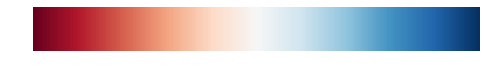

In [3]:
display_cmap('RdBu')

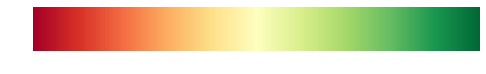

In [4]:
display_cmap('RdYlGn')

[`Seaborn`](http://stanford.edu/~mwaskom/software/seaborn/) allows defining  custom diverging colormaps.

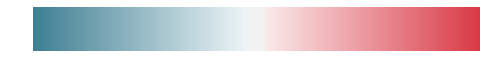

In [5]:
sns_cmap = sns.diverging_palette(220, 10, as_cmap=True)
display_cmap(sns_cmap)

[`palettable`](https://github.com/jiffyclub/palettable/) provides also a list of diverging colormaps.

In [6]:
from palettable.colorbrewer.diverging import  PRGn_3

The corresponding matplotlib colormap is defined by:

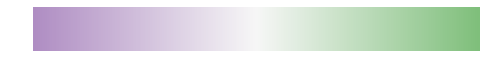

In [7]:
palett_cmap=PRGn_3.mpl_colormap 
display_cmap(palett_cmap)

Now we plot the heatmap associated to a `numpy.array` whose values are symmetric with respect to 0:

<matplotlib.colorbar.Colorbar instance at 0x000000001A439308>

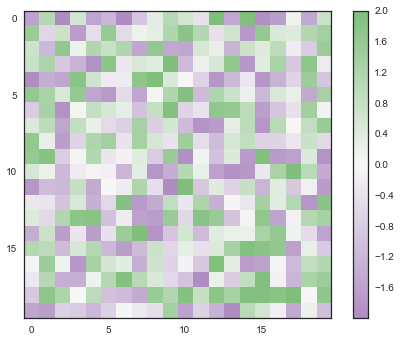

In [8]:
data=-2.0+4*np.random.random((20,20))
plt.imshow(data, palett_cmap, interpolation='nearest' )
plt.colorbar()

There are data sets that are asymmetric  with respect to a reference value, and it is also of interest to visualize them with a diverging colormap, in order to point out to what extent they exceed the reference value, respectively are under this value.

For example we could be interested in the temperature recorded in  an area, each month over many years, that exceeds or is below to $0$ Celsius degree or $32$ Fahrenheit degrees, or in financial data that are above or below a threshold, etc.



Symmetric diverging colormaps are not appropriate  for visualizing such data, as it can be seen in the following plot.

We generate a correlation matrix having elements in the interval $[-0.4, 0.9]$.


A correlation matrix is symmetric, and we visualize only the heatmap associated to its  lower triangular
submatrix, masking the upper triangular part.

The  function `rand_lower_correl` defines the lower triangular part of a correlation matrix, with elements randomly generated in an interval  $[a,b)\subset[-1,1)$:

In [9]:
def rand_lower_correl(n, (a, b), dtype=np.float):
    if b<a:
        raise ValueError('b must be greater than a')
    nr=  n * (n + 1) / 2 - n
    A = np.zeros([n, n], dtype=dtype)
    A[np.tril_indices(n, -1)] = a+(b-a)*np.random.random(nr)
    return A

In [10]:
C=rand_lower_correl(25, (-0.4, 0.9))


-0.398970636196 0.89731957331


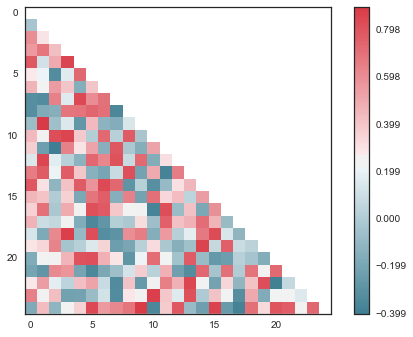

In [11]:
mask = np.zeros_like(C, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
C = np.ma.array(C, mask=mask)  #mask out the upper triangle in C

cmin=np.min(C)
cmax=np.max(C)
print cmin, cmax

dtick=-cmin/2
ticks=np.arange(cmin, cmax, dtick)

fig, ax=plt.subplots()
img=ax.imshow(C, interpolation="none", cmap=sns_cmap)

cbar = fig.colorbar(img, ticks=ticks)

The drawback of this  representation of correlations  is that the maximal luminance is not placed at the position of the (normalized) reference value (0 in this case). 

To be more informative such a heatmap   must have  isoluminant and opposite colored cells corresponding to values $-a$ and $a$.  In our image the cells corresponding to -0.19 and 0.19, for example,
are both blue and of different luminance.

It would be also more informative that   the  luminance at left and right of the position of maximum luminance  decrease monotonically with the same speed. In the image above  -0.39 and 0.39 have opposite colors, but do not have the same luminance.


Our aim is to associate an asymmetric diverging colormap to an asymmetric data range with respect to a  reference point, starting from a  (symmetric) diverging colormap, considered as being associated to a symmetric interval of data values with center at the reference point.

Such a colormap will have the maximum luminance at the normalized reference point, and a decreasing luminance with the same speed  toward ends, as in the images inserted in the next cells:

In [3]:
from IPython.display import Image

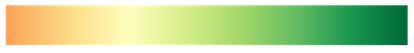

In [4]:
Image(filename='Data/asym_cmap1.jpg')

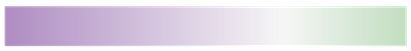

In [18]:
Image(filename='Data/asym_cmap2.jpg')

The basic idea for defining an asymmetric diverging colormap is illustrated in the  image `asymdiv.png`, and explained below.

In order to understand the explanations  we recall how we can retrieve the color code
of a color in a particular position of a matplotlib colormap:

In [20]:
from matplotlib import cm
cmap=cm.get_cmap('RdBu')

Now for any $t\in[0,1]$, `cmap(t)` gives the color code of the normalized value $t$, i.e. a tuple (r,g,b,a):

In [21]:
print cmap(0.23)

(0.8715109649826499, 0.45074972276594127, 0.35901577975235732, 1.0)


In our explanation below,   `cmap(t)`  must be understood in this sense, and $t$ will be referred to as the color index.

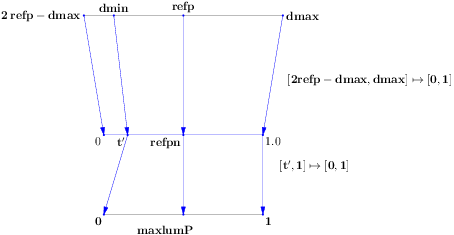

In [23]:
Image(filename='Data/asymdiv.png')

`dmin` and `dmax` are  the min and max values of our data, and 
    `refp` is the reference point, 
    `dmin`<`refp`< `dmax`.

We discuss the case `refp`-`dmin` < `dmax`-`refp`. The opposite case can  be easily deduced from this one.



 - theoretically, the values from the symmetric interval [`refp`-(`dmax`-`refp`), `dmax`]   are normalized and mapped to colors  in the chosen  symmetric diverging colormap, `cmap`.  
 - the normalized value of `dmin` is denoted by `t'`, whereas the normalized value of `refp`  by `refpn`. Obviously, `refpn` is $0.5$.
 - we define the assymmetric diverging colormap as being `cmap` restricted to continuous indices in the interval $[t',1)$. Normalizing values from $[t', 1)$, we denote by `maxluminP`  the normalized value of `refpn`, i.e. the index of the color of maximal luminance. 
 
 Then the  explicit definition of the asymmetric diverging colormap is done as follows:
  the intervals [`t'`, `1.0`] and  [0, 1.0] are divided by 256 equidistant points,  such that
     `refn` in the first interval, respectively `maxluminP`  in the second, be points of division.
  If t[i] is the $i^{th}$ point in [t',1], and s[i] in [0,1], then the asymmetric colormap, `asym_cmap`, stores at the position s[i] the color code `cmap`(t[i]), 
  $i=\overline{0,255}$.

These ideas are implemented by the function `asymmetric_cmap`:

In [24]:
def normalize(x,a,b): #normalization map: [a,b] --> [0,1]
    if a>b:
        raise ValueError('(a,b) is not an interval')
    return (float(x)-a)/(b-a)

In [ ]:
def asymmetric_cmap(data, div_cmap, ref_point=0.0, name= 'asym_cmap'):
    '''
    Input
    -----
      data: data to be visualized (a numpy aray of shape (m,n), a data frame, a list of lists of equal len)
      div_cmap :  a diverging matplotlib or seaborn colormap  (a matplotlib.colors.LinearSegmentedColormap object)
      ref_point is the reference point for data, the threshold of interest  
    '''
    if isinstance(data, pd.DataFrame):
        D = data.values
    elif isinstance(data, np.ma.core.MaskedArray):
        D=np.ma.copy(data)
    else:    
        D=np.asarray(data, dtype=np.float) 
    D=np.ma.masked_invalid(D)
    
    dmin=np.min(D)
    dmax=np.max(D)
    
    if not (dmin < ref_point < dmax):
        raise ValueError('data are not appropriate for visualization with a diverging colormap')
        
    if dmax-ref_point > ref_point-dmin:
        left=2*ref_point-dmax
        right=dmax
        
        tp=normalize(dmin, left,right)#normalized value of dmin
        refp_norm=normalize(ref_point, left, right) # normalized value of the ref_point in the symmetric interval
                                                   #[left, right]. It is 0.5 
       
        A=tp
        B=1.0
    else:
        left=dmin
        right=2*ref_point-dmin
        
        tp=normalize(dmax, left, right)#normalized value of dmax
        refp_norm=normalize(ref_point, left, right)
        
        A=0.0
        B=tp
    max_lumin_idx=normalize(refp_norm, A, B) # index for the max luminance position in the asymm div cmap
    
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # T is a (256,)  array 
    T = np.hstack([
        np.linspace(A, refp_norm, 128, endpoint=False), 
        np.linspace(refp_norm, B, 128)
    ])
   
    # T_assym is (256,) array 
    T_asymm = np.hstack([
        np.linspace(0, max_lumin_idx, 128, endpoint=False), 
        np.linspace(max_lumin_idx, 1.0, 128)
    ])

    for t, s in zip(T, T_asymm):
        r, g, b, a = div_cmap(t)

        cdict['red'].append((s, r, r))
        cdict['green'].append((s, g, g))
        cdict['blue'].append((s, b, b))
        cdict['alpha'].append((s, a, a))

    asym_cmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=asym_cmap)
    display_cmap(asym_cmap)
    return D, asym_cmap, dmin, dmax


Let us define an asymmetric colormap associated to data in the lower triagular matrix defined above, with respect to the reference point $0$, and derived from  the symmetric diverging colormap, `sns_cmap` (seaborn diverging colormap):

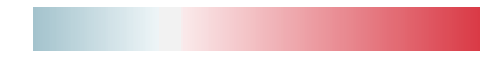

In [26]:
plot_data, asym_cmap=asymmetric_cmap(C, sns_cmap, ref_point=0)[:2]

Visualizing the correlation matrix with this colormap we get a better information on the features that  are positively, respectively negatively correlated.

<matplotlib.colorbar.Colorbar instance at 0x000000001A892788>

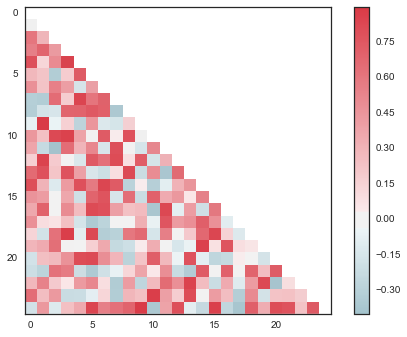

In [27]:
img=plt.imshow(plot_data, interpolation="none", cmap=asym_cmap)
plt.colorbar(img)

Now we give an example of data with a nonzero reference point.  Namely, we consider data containing
the average monthly temperature in Boston, between 1960 and 2000.  The reference point is 32 (degree Fahrenheit).

Data source: [Plotly public data](https://plot.ly/~alyssa.goodman/51). Rows correspond to years, and columns to months.

In [28]:
temp=[[30.5, 27, 34.4, 38.8, 55.5, 66.1, 72.9, 68.1, 64.4, 53.2, 41.6, 31.3, 48.6],
    [20.1, 22.3, 31.3, 42.5, 57.9, 66.7, 72.1, 71, 59.6, 50.1, 34.9, 29.6, 46.5], 
    [30.7, 27.5, 33.5, 43.9, 54.6, 68.9, 74, 70.3, 59.9, 48.3, 41.4, 22.2, 47.9],
    [24.8, 34.3, 34.9, 44.2, 55.1, 66.8, 71.1, 72.2, 65.2, 52, 44.2, 36.3, 50.1], 
    [27.9, 30.5, 39.6, 48.1, 56.5, 64.6, 73.7, 69.7, 64.2, 56.1, 40.8, 30.3, 50.2], 
    [24.2, 24.6, 33.6, 42.3, 60.2, 64.8, 70.8, 69.3, 61.9, 57.6, 38.7, 32.5, 48.4], 
    [34.6, 31.8, 33.2, 46.4, 63.7, 68.6, 71.7, 70.7, 65.2, 52.2, 38.2, 26.7, 50.2],
    [22, 27.9, 37.1, 43.6, 56.6, 61.7, 70.2, 71.3, 67.5, 54.5, 43.5, 39, 49.6],
    [26, 30.4, 36, 42.9, 50.5, 66.8, 73.2, 71.5, 64, 55.4, 39.3, 30.5, 48.9], 
    [24.3, 28.8, 30.7, 45.3, 56.6, 70.1, 71.7, 68.3, 59.8, 47.7, 42.8, 29, 47.9],
    [24.1, 31.1, 34.1, 43.8, 54.9, 67.2, 68.7, 69.7, 66.9, 52.7, 41.4, 33.7, 49], 
    [27.4, 20.6, 27.6, 47.2, 53.2, 66.8, 71.8, 67.8, 60.1, 51.6, 43.9, 32.7, 47.6],
    [25.7, 26.7, 33.3, 48.6, 56.7, 63.2, 71.2, 68.2, 63.1, 51.9, 43.2, 28.4, 48.3],
    [25.1, 28.7, 31.5, 44.2, 59.7, 65.2, 74.5, 67.6, 59.8, 51.5, 42.2, 32.3, 48.5],
    [20.1, 28.3, 32.2, 42.6, 53.1, 66.8, 68.8, 70.1, 59.8, 47.7, 43.9, 34.6, 47.3],
    [35.7, 26, 38.2, 47.8, 60.2, 69.1, 69.4, 67.3, 62.8, 48.5, 44.6, 38, 50.6], 
    [32.3, 33.3, 34.9, 46.3, 57, 64.2, 71, 68.9, 62.9, 51, 41.8, 26, 49.1],
    [31.1, 31.9, 33.7, 48, 55.8, 65, 69, 70, 66.7, 51.5, 41.3, 40.5, 50.4], 
    [28.3, 28.4, 32.9, 48.3, 55.9, 69.6, 73, 70.2, 62.5, 52.7, 41.2, 29.9, 49.4],
    [20.7, 26.8, 33.7, 44.3, 56.3, 64.7, 71.5, 69.6, 60, 54.8, 42.2, 30.4, 47.9],
    [30.1, 26.7, 42.5, 47, 57.5, 68.8, 73.7, 68, 64.8, 54, 38.2, 32.2, 50.3], 
    [28.8, 24.5, 34.6, 46, 60.2, 66.8, 69.3, 71, 65.7, 49.6, 45.4, 35.5, 49.8], 
    [24.9, 28.7, 31.9, 47.2, 60.3, 66.1, 71.8, 70.7, 62.2, 50.2, 46.5, 30.4, 49.2],
    [28.5, 30.9, 36.9, 49, 57.7, 62.2, 71.6, 69.6, 63.1, 54.4, 41.5, 34, 49.9],
    [28.7, 32.8, 42.9, 43.8, 55.9, 65.8, 71.8, 73.1, 66.2, 54.2, 42, 31.9, 50.8], 
    [29, 26.8, 34, 48.1, 57.7, 70, 72.6, 68.7, 62, 54.5, 42.1, 36.2, 50.1], 
    [30.1, 29.3, 34, 48.5, 55.2, 68.6, 73.9, 71.1, 64.9, 56.6, 44.7, 33.5, 50.9], 
    [27.6, 24.3, 36.2, 43.5, 54.3, 68.2, 73.5, 70.7, 65.4, 54.4, 37.3, 32.4, 49],
    [26.8, 28.9, 43.3, 48.4, 57.8, 64.3, 67.9, 67.6, 62.6, 53.6, 46.2, 28.6, 49.7], 
    [28.6, 31.4, 44.4, 47.9, 58.5, 59.8, 71.4, 65, 64.4, 53.9, 40, 29, 49.5], 
    [21.5, 22.6, 34.5, 44.7, 60.9, 64, 71.4, 68.7, 62.5, 50.5, 38.2, 25.8, 47.1], 
    [25.1, 23.4, 37.1, 46.8, 57.6, 65.2, 73.2, 68.6, 62, 53.6, 41.6, 35.1, 49.1], 
    [35.7, 29.7, 32.3, 47.2, 58, 66.4, 70.1, 72, 65, 52.5, 41.7, 29.1, 50],
    [27, 21.7, 37.9, 43.4, 52.5, 65.1, 72.4, 69.7, 64.4, 49.8, 43.3, 37.2, 48.7],
    [31, 26.7, 38.6, 46.8, 59, 69.8, 74.1, 69.4, 65.8, 55.4, 43.6, 33.3, 51.1],
    [30.3, 32.6, 36.8, 47.7, 55.8, 69.4, 71.5, 69.4, 62.6, 52.8, 46.4, 30.7, 50.5],
    [32, 29.5, 42, 51.6, 57.6, 65.2, 74.9, 68.8, 62.8, 56, 41.2, 27.5, 50.8], 
    [31.8, 27, 35.5, 46.1, 62.5, 65.5, 77.1, 69, 62.5, 52.6, 41.9, 39.4, 50.9],
    [21.4, 27.7, 36, 47.4, 58.6, 68, 73.2, 68.9, 63.7, 57.5, 45.7, 38.5, 50.6],
    [39.3, 27.7, 42.4, 48, 55.1, 67.5, 73.8, 70.7, 62, 56.5, 46.5, 37.8, 52.3], 
    [28.7, 24.3, 36.7, 45.3, 60.3, 67.3, 68.6, 70.4, 64.6, 57, 42.7, 30.4, 49.7],
   ]
      

The associated asymmetric diverging colormap:

data min value = 20.1 data max value = 77.1


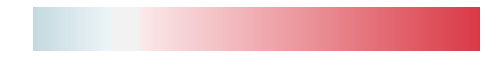

In [30]:
temp_data, asym_cmap, dmin, dmax =asymmetric_cmap(temp, sns_cmap, ref_point=32.0)
print 'data min value =', dmin, 'data max value =', dmax

In [31]:
plt.rcParams['figure.figsize'] = 12,8

In [32]:
dtick=(32-dmin)/2
ticks=np.arange(dmin, dmax, dtick)

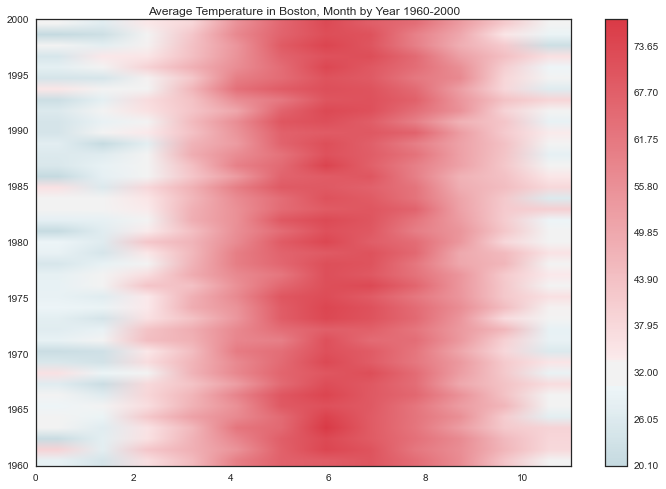

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
extent=[0,11.0,  1960, 2000]
aspect=abs((extent[1]-extent[0])/(extent[3]-extent[2]))/1.2
img=ax.imshow(temp_data[:,:12], interpolation="bilinear",  extent=extent, aspect=aspect,  cmap=asym_cmap)
cbar = fig.colorbar(img, ticks=ticks.round(2))
ax.set_title('Average Temperature in Boston, Month by Year 1960-2000')

In [1]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()